<h1 style="font-family: loraserif; font-size: 14px; color: #2e1e3b; text-align: right; ">Created By: Jieru He</h1>


<h1 style="font-family: loraserif; padding: 12px; font-size: 48px; color: #273e47; text-align: center"><b>Carbon Emissions</b><br><span style="color: #37659e; font-size: 25px">Analysis and Forecast CO2 Time Series Dataset</span></h1>
<hr>

<h1><b><span style=";color: #273e47; font-size: 24px">TABLE OF CONTENTS</span></b></h1>

#### 1. [Introduction](#0)
#### 2. [Data Preparation](#1)
#### 3. [EDA and Data Visualization](#2)
#### 4. [Analysis of Natural Gas CO2 Emission](#3)
#### 5. [Data Processing](#4)
#### 6. [Data Modelling](#5)
#### 7. [Conclusion](#6)

<a id="0"></a>
<h1><b><span style="color: #273e47; font-size: 24px">1. INTRODUCTION</span></b></h1>

![img](https://helios-i.mashable.com/imagery/articles/04XY918auQETloPMrA2Fp4H/hero-image.fill.size_1200x900.v1611607840.jpg)

Carbon dioxide (CO2) is released during the combustion of fossil fuels, such as coal, oil, and natural gas, to produce electricity. As a result, countries adopted The Paris Agreement to limit greenhouse gases as soon as possible to combat global warming. Emissions need to be cut by roughly 50% by 2030 to stay below 1.5 °C. However, given the rising trend of CO2 emissions, is the goal still realistic within the expected timeframe?

To answer this question, I analyzed the trend and pattern of CO2 emissions generated by different energy sources in the USA from 1973 till the present year 2022. I also focused on the CO2 emissions from natural gas to predict its future growth. 

My step-by-step approach is:
- retrieve and clean data
- explore and visualize data
- test if the time series is stationary or not using graphical and statistical methods
- transform it to stationary data
- find optimal parameters to build seasonal Autoregressive Integrated Moving Average (SARIMA) model using grid search method
- diagnose the prediction result
- validate the predictive power
- and finally forecast  10 year future CO2 emission from power generation using natural gas. 



<a id="1"></a>
<h1><b><span style="color: #273e47; font-size: 24px">2. DATA PREPARATION</span></b></h1>

### CO2 Emission Dataset Source
Nearly all sectors consume energy, including residential, commercial, industrial, transportation, electric power, and biomass. The U.S. Energy Information Administration (EIA) disseminates info and data from different sources, coal, petroleum, natural gas, electric, renewable and nuclear energy, from these sectors to the public. In this project, I downloaded the monthly CO2 emissions from the electric power sector from January 1973 to July 2022 and reformatted the spreadsheet in excel as the very first data-cleaning step.

For further information about how CO2 emissions are estimated and categorized into electric power sector, click [here](https://www.eia.gov/totalenergy/data/monthly/). 

### Import Libraries

In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import itertools
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [80]:
df=pd.read_excel("co2-emission-2022.xlsx")

In [81]:
df.head(3)

Month  Coal Electric Power Sector CO2 Emissions  \
0 1973-01-01                                    73.112   
1 1973-02-01                                    65.369   
2 1973-03-01                                    65.006   

   Natural Gas Electric Power Sector CO2 Emissions  \
0                                           12.163   
1                                           11.696   
2                                           13.979   

   Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions  \
0                                              2.397                                            
1                                              2.080                                            
2                                              1.181                                            

   Petroleum Coke Electric Power Sector CO2 Emissions  \
0                                              0.128    
1                                              0.106    
2                                              0.083    

   Residual Fuel Oil Electric Power Sector CO2 Emissions  \
0                                             23.698       
1                                             19.886       
2                                             18.851       

   Petroleum Electric Power Sector CO2 Emissions  \
0                                         26.223   
1                                         22.071   
2                                         20.115   

  Geothermal Energy Electric Power Sector CO2 Emissions  \
0                                      Not Available      
1                                      Not Available      
2                                      Not Available      

  Non-Biomass Waste Electric Power Sector CO2 Emissions  \
0                                      Not Available      
1                                      Not Available      
2                                      Not Available      

   Total Energy Electric Power Sector CO2 Emissions  
0                                           111.499  
1                                            99.137  
2                                            99.100

In [82]:
df.describe()

Coal Electric Power Sector CO2 Emissions  \
count                                595.000000   
mean                                 121.184457   
std                                   33.212543   
min                                   42.783000   
25%                                   93.271000   
50%                                  124.577000   
75%                                  147.362500   
max                                  188.309000   

       Natural Gas Electric Power Sector CO2 Emissions  \
count                                       595.000000   
mean                                         24.923647   
std                                          13.867655   
min                                           7.441000   
25%                                          14.105500   
50%                                          19.829000   
75%                                          34.133500   
max                                          76.407000   

       Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions  \
count                                         595.000000                                            
mean                                            0.732360                                            
std                                             0.554748                                            
min                                             0.201000                                            
25%                                             0.394000                                            
50%                                             0.522000                                            
75%                                             0.879000                                            
max                                             4.078000                                            

       Petroleum Coke Electric Power Sector CO2 Emissions  \
count                                         595.000000    
mean                                            0.662461    
std                                             0.554190    
min                                             0.009000    
25%                                             0.095000    
50%                                             0.659000    
75%                                             1.043500    
max                                             2.210000    

       Residual Fuel Oil Electric Power Sector CO2 Emissions  \
count                                         595.000000       
mean                                            6.838355       
std                                             6.728806       
min                                             0.263000       
25%                                             1.011500       
50%                                             5.336000       
75%                                             8.689500       
max                                            31.338000       

       Petroleum Electric Power Sector CO2 Emissions  \
count                                     595.000000   
mean                                        8.233176   
std                                         6.848101   
min                                         0.891000   
25%                                         2.699500   
50%                                         6.628000   
75%                                        10.075500   
max                                        35.430000   

       Total Energy Electric Power Sector CO2 Emissions  
count                                        595.000000  
mean                                         154.943392  
std                                           33.448088  
min                                           87.316000  
25%                                          127.306000  
50%                                          153.560000  
75%                                          178.306000  
max               

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 10 columns):
 #   Column                                                                                      Non-Null Count  Dtype         
---  ------                                                                                      --------------  -----         
 0   Month                                                                                       595 non-null    datetime64[ns]
 1   Coal Electric Power Sector CO2 Emissions                                                    595 non-null    float64       
 2   Natural Gas Electric Power Sector CO2 Emissions                                             595 non-null    float64       
 3   Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions  595 non-null    float64       
 4   Petroleum Coke Electric Power Sector CO2 Emissions                                          595 non-null    float64       

The dataset has 10 columns, where 2 of them are object data type because of Not-Available values, so I need to address it in the next step. The first column of datetime64 datatype indicates the dataset is already a time series.

### Data Cleaning
The emission data of geothermal and non-biomass waste are missing before the year 1989. Actually the world's first hybrid (organic Rankine/gas engine) geopressure-geothermal power plant begins operation at Pleasant Bayou, Texas in 1989. 

Normally backfill and forward fill are the common imputation methods. However, this part dealt with the missing values by directly filling na values because of the special time condition. I also rename the column names to be simple. 

In [84]:
df = pd.read_excel("co2-emission-2022.xlsx", na_values='Not Available',keep_default_na=True)

In [85]:
df.isnull().sum()

Month                                                                                           0
Coal Electric Power Sector CO2 Emissions                                                        0
Natural Gas Electric Power Sector CO2 Emissions                                                 0
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions      0
Petroleum Coke Electric Power Sector CO2 Emissions                                              0
Residual Fuel Oil Electric Power Sector CO2 Emissions                                           0
Petroleum Electric Power Sector CO2 Emissions                                                   0
Geothermal Energy Electric Power Sector CO2 Emissions                                         192
Non-Biomass Waste Electric Power Sector CO2 Emissions                                         192
Total Energy Electric Power Sector CO2 Emissions                                                0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 10 columns):
 #   Column                                                                                      Non-Null Count  Dtype         
---  ------                                                                                      --------------  -----         
 0   Month                                                                                       595 non-null    datetime64[ns]
 1   Coal Electric Power Sector CO2 Emissions                                                    595 non-null    float64       
 2   Natural Gas Electric Power Sector CO2 Emissions                                             595 non-null    float64       
 3   Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions  595 non-null    float64       
 4   Petroleum Coke Electric Power Sector CO2 Emissions                                          595 non-null    float64       

In [87]:
df.rename({"Month":"Time","Coal Electric Power Sector CO2 Emissions":"Coal","Natural Gas Electric Power Sector CO2 Emissions":"Natural Gas","Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions":"Distillate Fuel","Petroleum Coke Electric Power Sector CO2 Emissions":"Petroleum Coke","Residual Fuel Oil Electric Power Sector CO2 Emissions":"Residual Fuel Oil","Petroleum Electric Power Sector CO2 Emissions":"Petroleum","Geothermal Energy Electric Power Sector CO2 Emissions":"Geothermal","Non-Biomass Waste Electric Power Sector CO2 Emissions":"Non-Biomass Waste","Total Energy Electric Power Sector CO2 Emissions":"Total Energy Electric Power Sector"},axis=1,inplace=True)

In [88]:
df.set_index("Time",inplace=True)

In [89]:
df.columns

Index(['Coal', 'Natural Gas', 'Distillate Fuel', 'Petroleum Coke',
       'Residual Fuel Oil', 'Petroleum', 'Geothermal', 'Non-Biomass Waste',
       'Total Energy Electric Power Sector'],
      dtype='object')

<a id="2"></a>
<h1><b><span style="color: #273e47; font-size: 24px">3. EDA & DATA VISUALIZATION</span></b></h1>

I plotted the CO2 emission time series dataset to visualize the trend, the percentage, and correlation of different emission sources in the power generation. 

### Emission Trend

In [90]:
df.iloc[:,0:7]

Coal  Natural Gas  Distillate Fuel  Petroleum Coke  \
Time                                                               
1973-01-01  73.112       12.163            2.397           0.128   
1973-02-01  65.369       11.696            2.080           0.106   
1973-03-01  65.006       13.979            1.181           0.083   
1973-04-01  61.717       14.612            1.031           0.130   
1973-05-01  62.686       17.326            0.957           0.167   
...            ...          ...              ...             ...   
2022-03-01  62.039       42.755            0.316           0.598   
2022-04-01  55.740       41.244            0.247           0.635   
2022-05-01  63.403       50.612            0.294           0.826   
2022-06-01  75.564       62.751            0.324           0.803   
2022-07-01  89.562       76.407            0.320           0.601   

            Residual Fuel Oil  Petroleum  Geothermal  
Time                                                  
1973-01-01             23.698     26.223         NaN  
1973-02-01             19.886     22.071         NaN  
1973-03-01             18.851     20.115         NaN  
1973-04-01             15.783     16.944         NaN  
1973-05-01             16.920     18.044         NaN  
...                       ...        ...         ...  
2022-03-01              0.348      1.263       0.040  
2022-04-01              0.281      1.163       0.039  
2022-05-01              0.329      1.448       0.040  
2022-06-01              0.313      1.440       0.039  
2022-07-01              0.382      1.302       0.040  

[595 rows x 7 columns]

Text(0.5, 1.0, 'Carbon Emissions of US Energy from 1973-2022')

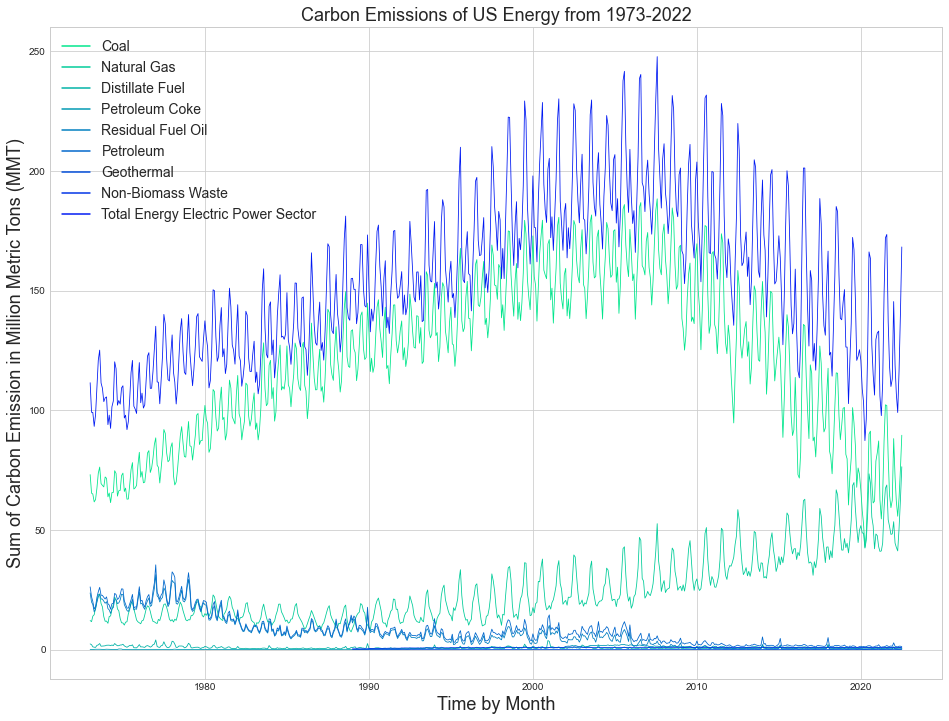

In [91]:
plt.figure(figsize=(16,12))
sns.lineplot(data=df,palette="winter_r",markers=None, dashes=False, lw=0.8)
plt.xlabel("Time by Month",fontsize=18)
plt.ylabel("Sum of Carbon Emission in Million Metric Tons (MMT)",fontsize=18)
plt.legend(fontsize=14)
plt.style.use('seaborn-whitegrid')

plt.title('Carbon Emissions of US Energy from 1973-2022', fontsize = 18,loc="center")

In [92]:
sns.color_palette("winter_r")

[(0.0, 0.8588235294117648, 0.5705882352941176),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.4274509803921569, 0.7862745098039216),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.14117647058823535, 0.9294117647058824)]

In [93]:
print(sns.color_palette("winter_r").as_hex())

['#00db92', '#00b6a4', '#0092b6', '#006dc8', '#0049db', '#0024ed']


In [94]:
color=['#00db92', '#00b6a4', '#0092b6', '#006dc8', '#0049db', '#0024ed','#006dc8', '#0049db', '#0024ed']

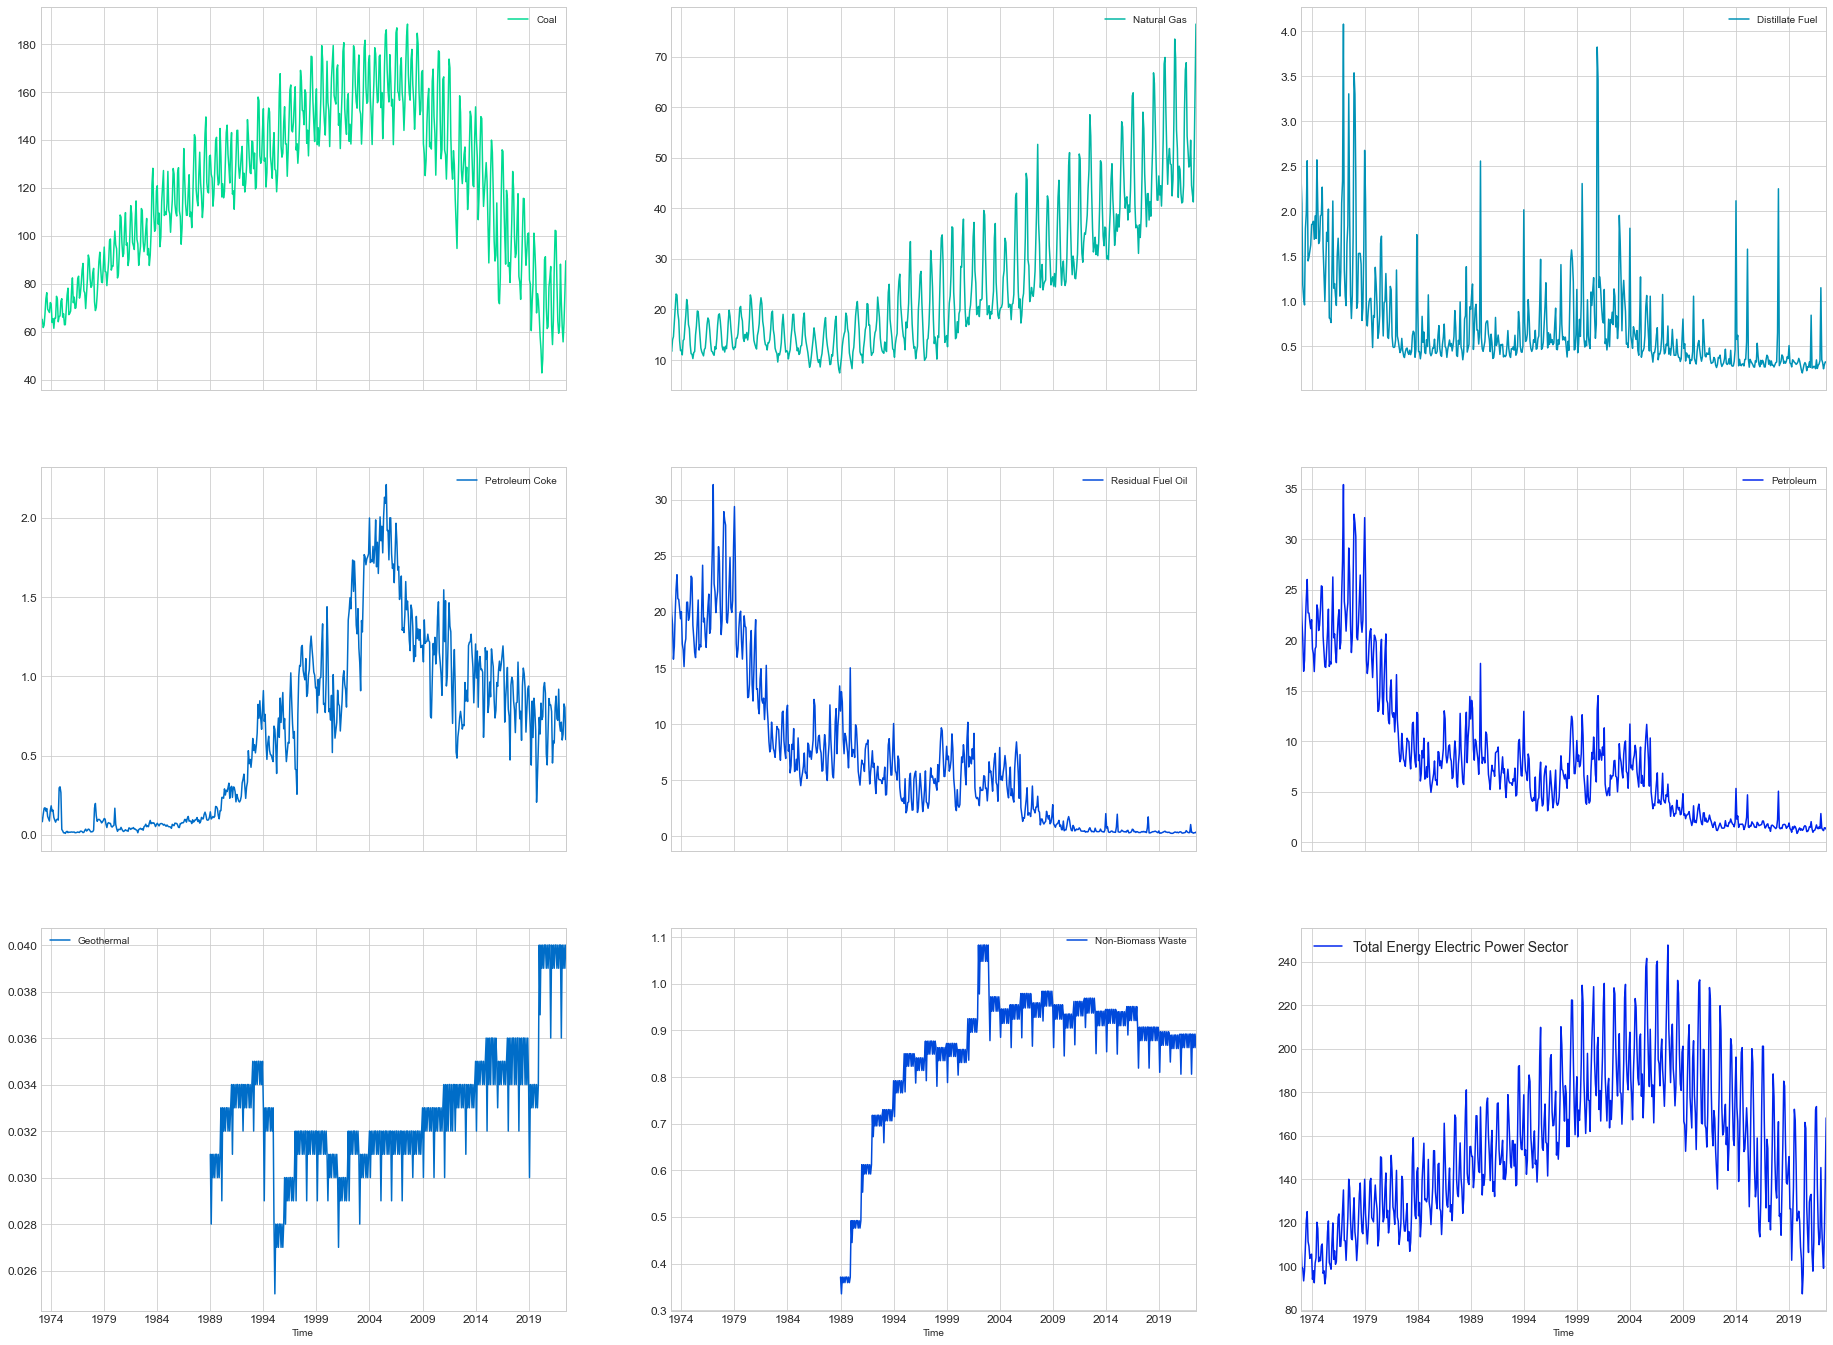

In [95]:
df.plot(subplots=True, layout=(3,3), figsize = (32, 24),fontsize=12, color = color)
plt.legend(fontsize=14)

The charts clearly show the declining trend of carbon emissions in the total energy electric power sector (especially after 2008 Global Financial Crisis) and all the individual sources except natural gas and geothermal.

### Emission by Energy Source

In [96]:
df.sum().sort_values(ascending=False)

Total Energy Electric Power Sector    92191.318
Coal                                  72104.752
Natural Gas                           14829.570
Petroleum                              4898.740
Residual Fuel Oil                      4068.821
Distillate Fuel                         435.754
Petroleum Coke                          394.164
Non-Biomass Waste                       345.089
Geothermal                               13.202
dtype: float64

In [97]:
order_sum=df.sum().sort_values(ascending=False)

In [98]:
cols=['Total Energy', 'Coal', 'Natural Gas',
       'Petroleum', 'Residual Fuel Oil', 'Non-Biomass Waste',
       'Distillate Fuel', 'Petroleum Coke', 'Geothermal']

In [99]:
color1=['#0024ed','#00db92', '#00b6a4', '#0092b6', '#006dc8', '#0049db', '#006dc8', '#0049db', '#0024ed']

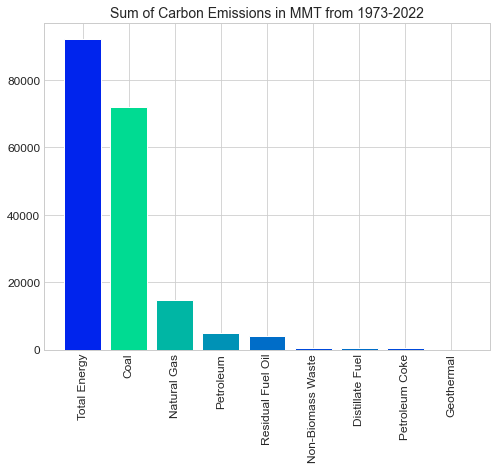

In [100]:
plt.figure(figsize=(8,6))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick,order_sum,align="center",color = color1)
plt.title('Sum of Carbon Emissions in MMT from 1973-2022', fontsize = 14,loc="center")
plt.xticks(x_tick, x_label, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [101]:
order=df.sum().sort_values(ascending=False).index.tolist()

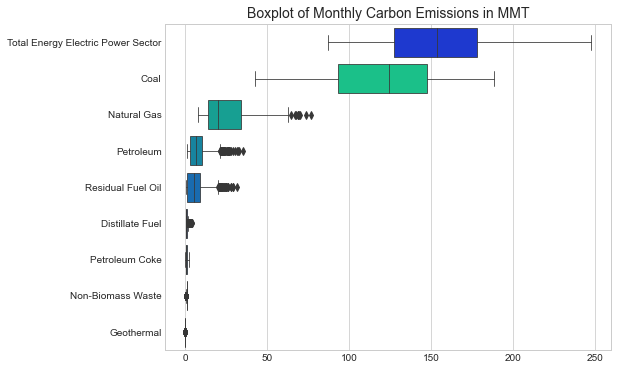

In [102]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, orient="h",order=order,palette=color1,linewidth=0.8)
plt.title('Boxplot of Monthly Carbon Emissions in MMT', fontsize = 14,loc="center")
plt.show()

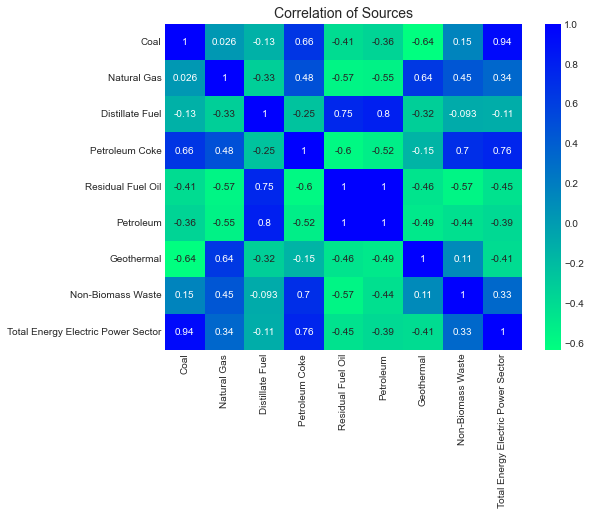

In [103]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="winter_r",annot=True)
plt.title('Correlation of Sources', fontsize = 14,loc="center")
plt.show()

[Research](https://www.nytimes.com/2021/07/29/climate/carbon-emissions-death.html#:~:text=candidate%20at%20Columbia%20University%2C%20calculated,will%20cause%20226%20deaths%20globally.) shows that adding about a quarter of the output of a coal-fired power plant, or roughly a million metric tons of carbon dioxide, to the atmosphere on top of 2020 levels for just one year will cause 226 deaths globally. From the chart, we see that the globe has produced more than 90k million metric tons of carbon dioxide since 1973. Thus, CO2 emissions have caused extensive changes to our planet.

<a id="3"></a>
<h1><b><span style="color: #273e47; font-size: 24px">4. Analysis of Natural Gas CO2 Emission</span></b></h1>

From the previous charts, I found that coal contributes most to the total CO2 emissions followed by natural gas and petroleum. CO2 emission of natural gas is selected for the next analysis and forecast because of its large volumn and increasing trend.

In [104]:
gas=df.iloc[:,1]

In [105]:
gas

Time
1973-01-01    12.163
1973-02-01    11.696
1973-03-01    13.979
1973-04-01    14.612
1973-05-01    17.326
               ...  
2022-03-01    42.755
2022-04-01    41.244
2022-05-01    50.612
2022-06-01    62.751
2022-07-01    76.407
Name: Natural Gas, Length: 595, dtype: float64

### Test Stationarity
To qualify as stationary time series, a dataset should have:
- mean independent of time
- variance independent of time
- and covariance of two observations k steps apart independent of time

If trend and seasonality are present in the dataset, they will be removed from the series to transform the nonstationary dataset into stationary and the residuals are further analyzed. I used 3 ways to test stationarity.

### a) Graphical Method

In [106]:
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

In [107]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

Text(0.5, 1.0, 'Monthly CO2 Emission by Natural Gas')

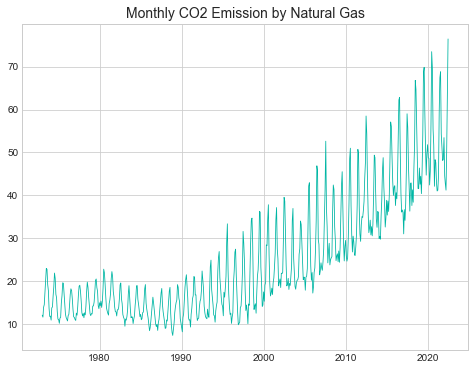

In [108]:
plt.figure(figsize=(8,6))
plt.plot(gas,lw=0.8,color="#00b6a4")
plt.title('Monthly CO2 Emission by Natural Gas', fontsize = 14,loc="center")

By plotting out the natural gas line chart, it is evident that the mean changes over time and there is seasonal variation in the dataset. So, I can infer that it is not stationary.

### b) Summary Statistics Method

In [109]:
split = round(len(gas) / 2)
X1, X2 = gas[0:split], gas[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=15.100953, mean2=34.779414
variance1=18.009761, variance2=173.250959


As another way of quick check to see if the time series is non-stationary, I split the dataset into two (or more) partitions and compare the mean and variance of each group. The mean and variance of each group clearly differs and the difference is statistically significant, so the time series is likely non-stationary. 

Text(0.5, 1.0, 'Distribution of Monthly CO2 Emission by Natural Gas')

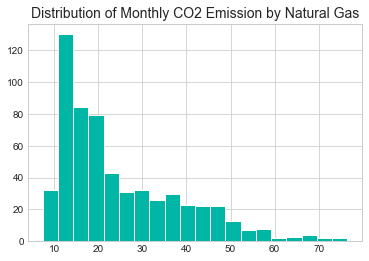

In [110]:
gas.hist(color="#00b6a4", bins=20)
plt.title('Distribution of Monthly CO2 Emission by Natural Gas', fontsize = 14,loc="center")

By plotting the values of the time series as a histogram, I also see that the dataset doesn't look like a Gaussian distribution but more close to a Poisson distribution. Therefore the mean and variance values are less meaningful in this case.

### c) Dickey-Fuller Test Method

The thirth way to test stationarity is using a statistical test - the Dickey-Fuller Test. The null hypothesis for the test is that the time series is non-stationary. 

In [111]:
sts.adfuller(gas)

(1.6491831387919833,
 0.9979978786001208,
 18,
 576,
 {'1%': -3.441753961421302,
  '5%': -2.866570853087291,
  '10%': -2.5694492998890817},
 2529.021538537952)

The test results shows 1.64 as the Test Statistic is larger than the critical values of 90%, 95% and 99% confidence levels. Plus, the p value associated with the T statistic indicates 99.7% chance of not rejecting the null. Thus, it is a non-stationary time series.

18 represents the number of lags used in the regression, so there are some autocrrelation going back 18 periods. I will take this into account when determining the paratermers of data modeling.

### Examine Specific Events
To clearly see the trend of natural gas CO2 emissions, I used the trailing average method to reveal hidden trends by smoothing out seasonality.

By looking at the smoothed-out emission data, I investigated specific events leading to the peaks of CO2 emission in 2012, 2016, and 2020.

In [112]:
# average over 12 data points as window equals 12
def TestStationaryPlot(gas, plot_label = None):
    rol_mean = gas.rolling(window = 12, center = False).mean()
    rol_std = gas.rolling(window = 12, center = False).std()
    plt.figure(figsize=(16,12))
    plt.plot(gas, color = "#00b6a4",label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.xlabel('Time', fontsize = 12)
    plt.ylabel('Total Emissions', fontsize = 12)
    plt.legend(loc='best', fontsize = 18)
    if plot_label is not None:
        plt.title('Rolling Mean & Standard Deviation (' + plot_label + ')', fontsize = 18)
    else:
        plt.title('Rolling Mean & Standard Deviation', fontsize = 12)
    plt.show(block= True)

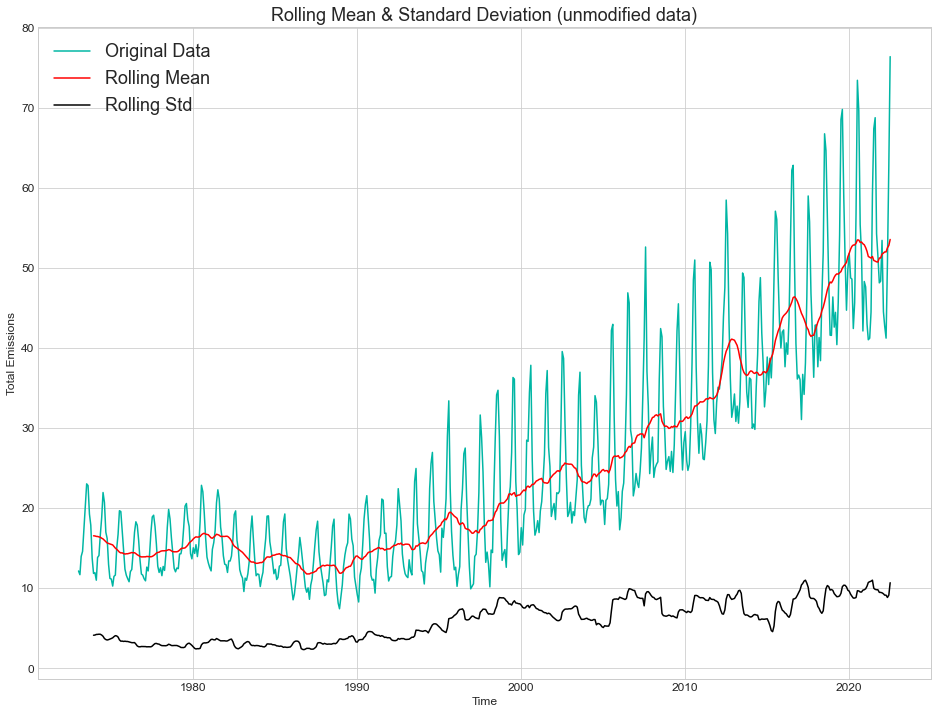

<Figure size 432x288 with 0 Axes>

In [113]:
TestStationaryPlot(gas, 'unmodified data')
plt.tight_layout()

Between 2010 to 2020, there are several spikes of emissions. In order to know the exact data and volumn, I created interactive charts.

In [114]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

5.6.0


In [115]:
rol_mean = gas.rolling(window = 12, center = False).mean()
rol_mean.iplot(kind="line",color = 'red', title = 'Rolling Mean')

Here are the possible reasons of spikes:
- The more severe winter conditions 2012-14 made it necessary to increase the consumption of heating fuels; leading to the largest source of increased total U.S. carbon emissions 2012-14.
- Natural gas prices were the lowest in 2016 in nearly 20 years. As a result, gas surpassed coal as the primary power generation fuel supplying more than a third of the country’s electricity. Emission consequently climbs.
- As a result of Coronavirus Disease in 2019 and intensified geopolitical tensions, the energy consumption continues growing.

<a id="4"></a>
<h1><b><span style="color: #273e47; font-size: 24px">5. Data Processing</span></b></h1>

There are three ways to remove trends and seasonality from the time series.

### a) De-trending by Trailing Average / Exponential Moving Average

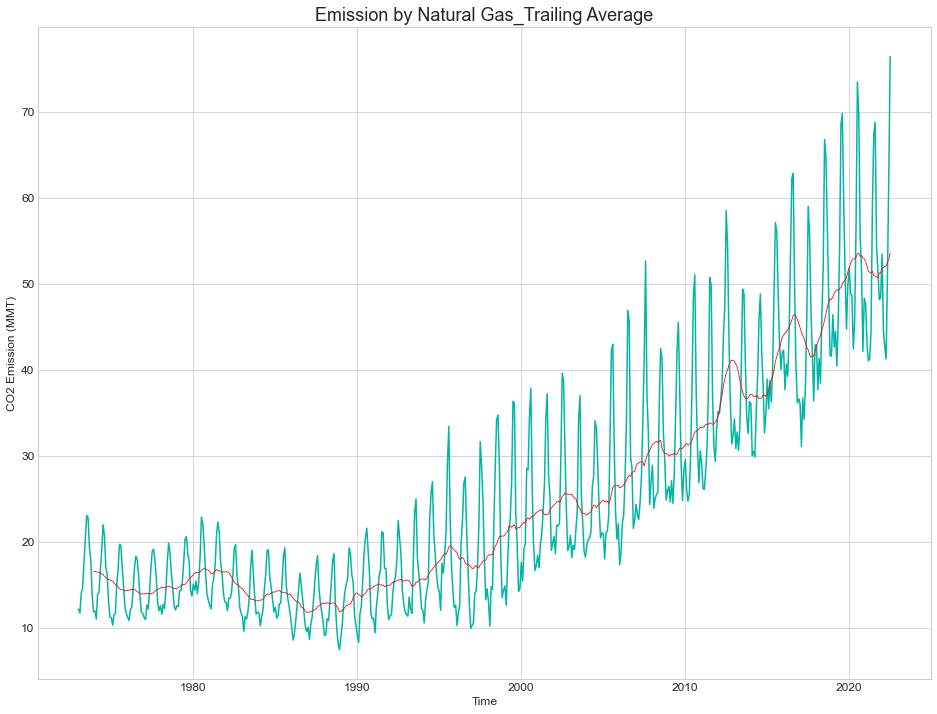

In [116]:
plt.figure(figsize=(16,12))
moving_avg = gas.rolling(12).mean()
plt.plot(gas,color="#00b6a4")
plt.plot(moving_avg, color='red',lw=0.8)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('CO2 Emission (MMT)', fontsize = 12)
plt.title('Emission by Natural Gas_Trailing Average', fontsize = 18)
plt.show()

The red line shows the rolling mean. I then subtract the moving average from the original series.

In [117]:
gas_moving_avg_diff = gas - moving_avg
gas_moving_avg_diff.head(13)

Time
1973-01-01         NaN
1973-02-01         NaN
1973-03-01         NaN
1973-04-01         NaN
1973-05-01         NaN
1973-06-01         NaN
1973-07-01         NaN
1973-08-01         NaN
1973-09-01         NaN
1973-10-01         NaN
1973-11-01         NaN
1973-12-01   -4.700417
1974-01-01   -4.589417
Name: Natural Gas, dtype: float64

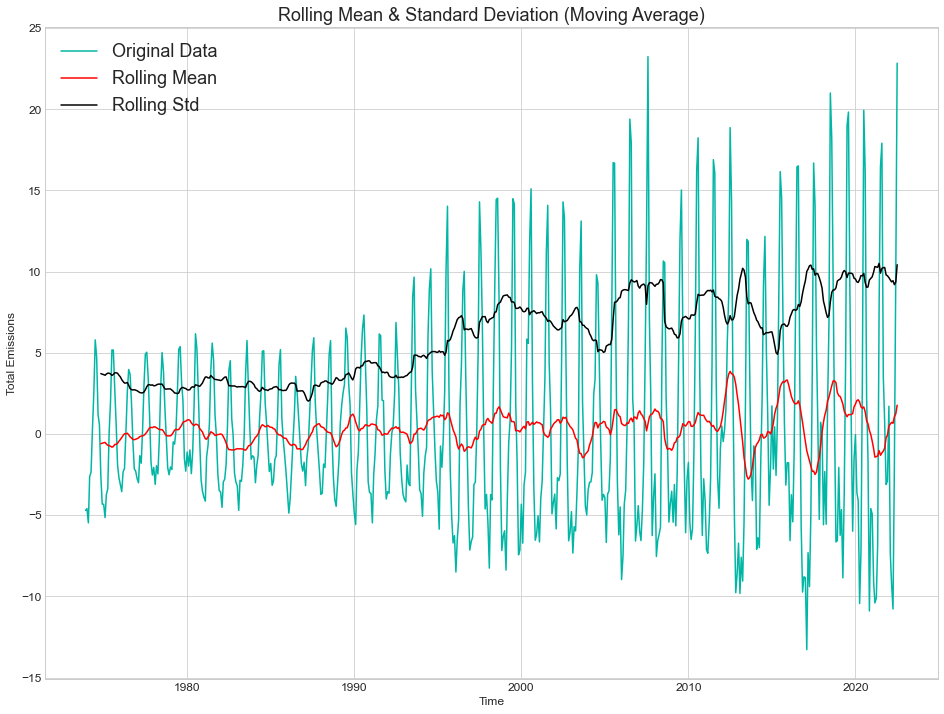

In [118]:
gas_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(gas_moving_avg_diff, 'Moving Average')

In [119]:
sts.adfuller(gas_moving_avg_diff)

(-7.730560867534122,
 1.1283595741312826e-11,
 14,
 569,
 {'1%': -3.4418948967017475,
  '5%': -2.8666329082535222,
  '10%': -2.569482366838501},
 2376.1182638432465)

The rolling mean values appear to be varying around 0. The Test Statistic is smaller than the 10% 5%, and 1% of critical values. And the p value is significantly close to zero. The dataset is a stationary series.

For data with high variance over time, we can smooth the data with an exponential moving average where more recent values are given a higher weight. In this technique, weights are assigned to all previous values with a decay factor. It averages back to a central trend without masking any recent movements.

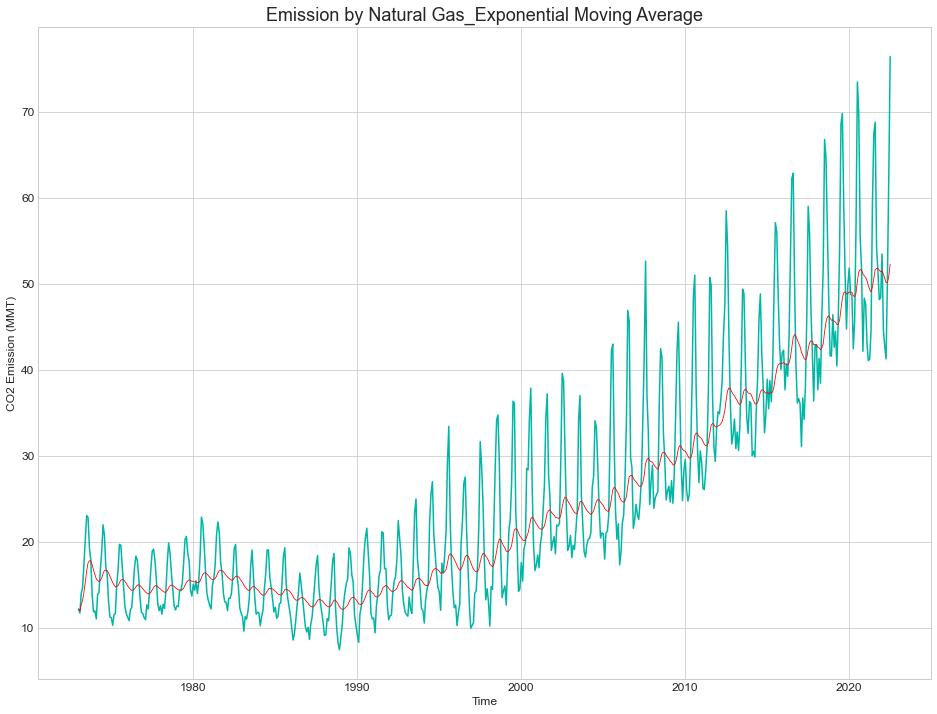

In [120]:
plt.figure(figsize=(16,12))
gas_exp_weighted_avg = gas.ewm(halflife=12).mean()
plt.plot(gas,color="#00b6a4")
plt.plot(gas_exp_weighted_avg, color='red',lw=0.8)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('CO2 Emission (MMT)', fontsize = 12)
plt.title('Emission by Natural Gas_Exponential Moving Average', fontsize = 18)
plt.show()

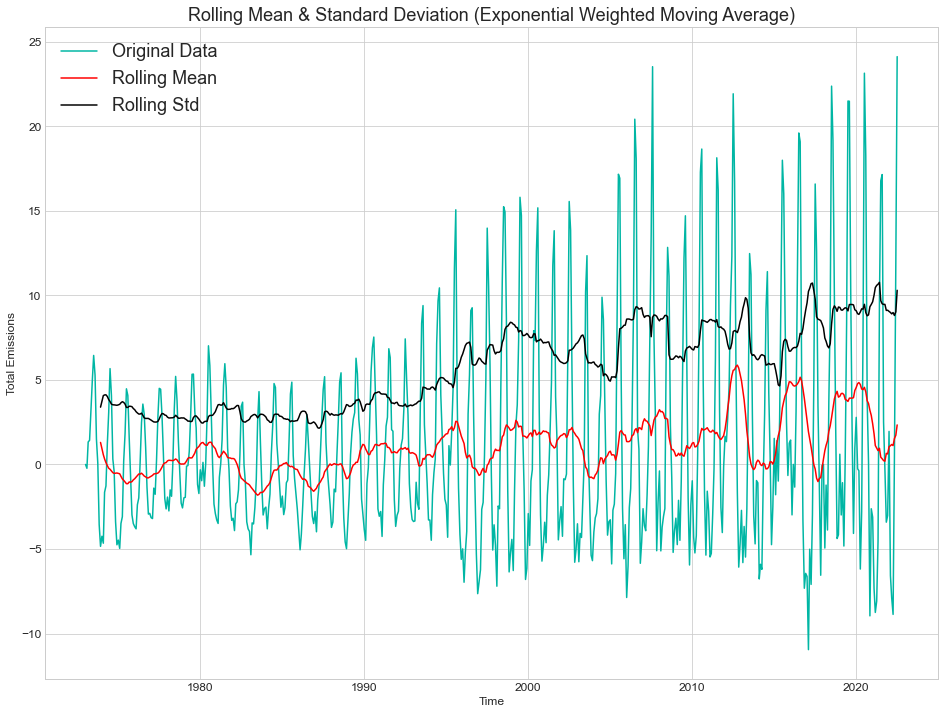

In [121]:
gas_ewma_diff = gas - gas_exp_weighted_avg
TestStationaryPlot(gas_ewma_diff, 'Exponential Weighted Moving Average')

In [122]:
sts.adfuller(gas_ewma_diff)

(-5.009713706810803,
 2.1231441873911803e-05,
 14,
 580,
 {'1%': -3.4416749612171467,
  '5%': -2.8665360672844318,
  '10%': -2.5694307639714626},
 2459.4920509166873)

This time series has lesser variations in mean and standard deviation compared to the original dataset. Also, the Test Statistic is smaller than the 5% and 10% critical value, which is better than the original case.

### b) Eliminating Both Trend and Seasonality by Differencing
One of the most common method of dealing with both trend and seasonality is differencing. In this technique, I take the difference of the original observation at a particular instant with that at the previous instant. This mostly works well to improve stationarity.

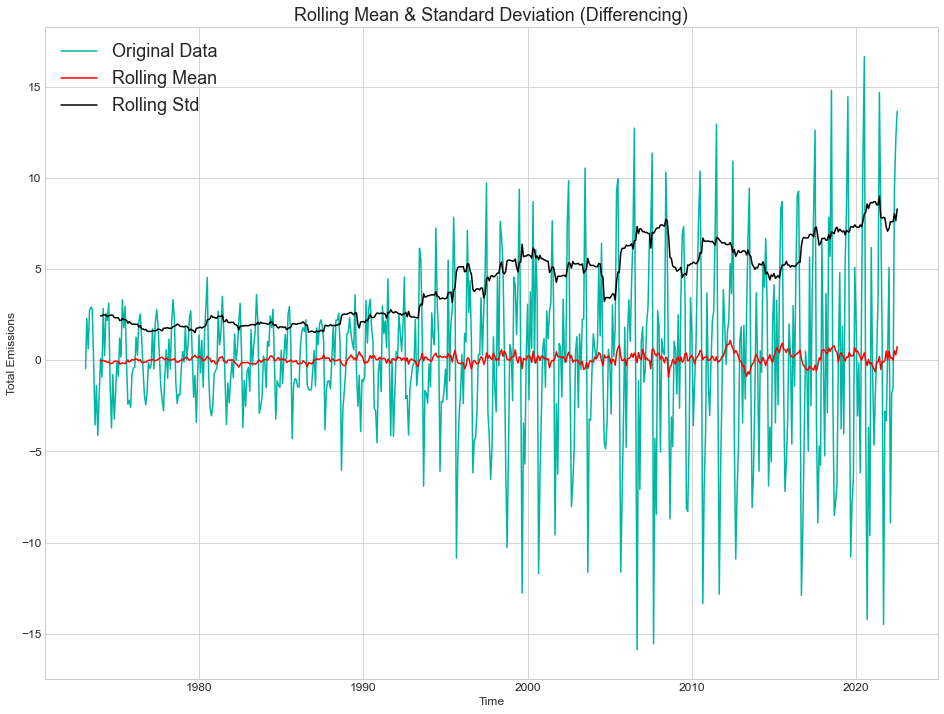

In [123]:
gas_first_difference = gas - gas.shift(1)  
TestStationaryPlot(gas_first_difference.dropna(inplace=False), 'Differencing')

In [124]:
gas_first_difference

Time
1973-01-01       NaN
1973-02-01    -0.467
1973-03-01     2.283
1973-04-01     0.633
1973-05-01     2.714
               ...  
2022-03-01    -1.783
2022-04-01    -1.511
2022-05-01     9.368
2022-06-01    12.139
2022-07-01    13.656
Name: Natural Gas, Length: 595, dtype: float64

In [125]:
sts.adfuller(gas_first_difference.iloc[1:])

(-6.181214852554325,
 6.448373393561567e-08,
 18,
 575,
 {'1%': -3.4417738839904657,
  '5%': -2.8665796253604015,
  '10%': -2.569453974291115},
 2525.9497413946397)

The first difference improves the stationarity of the series significantly. Let us use also remove the seasonality of the data.

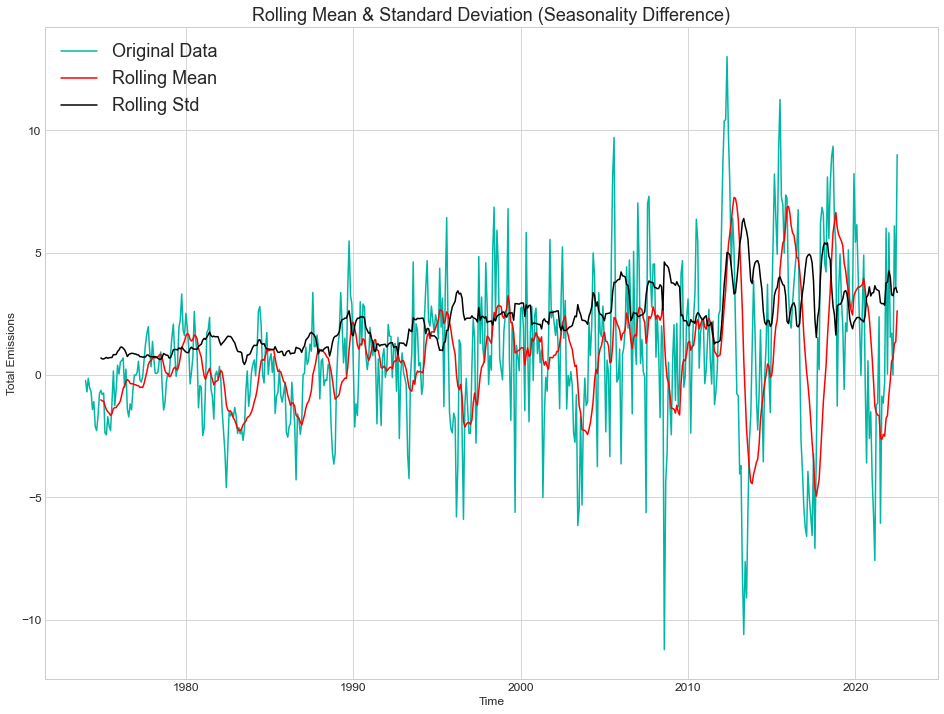

(-6.592798793580161,
 7.045483556265331e-09,
 12,
 570,
 {'1%': -3.441874550188182,
  '5%': -2.8666239496633246,
  '10%': -2.569477593105571},
 2441.0482059897254)

In [126]:
gas_seasonal_difference = gas - gas.shift(12)  
TestStationaryPlot(gas_seasonal_difference.dropna(inplace=False), 'Seasonality Difference')
sts.adfuller(gas_seasonal_difference.iloc[12:])

Compared to the original data the seasonal difference also improves the stationarity of the series. The next step is to take the first difference off the seasonal difference.

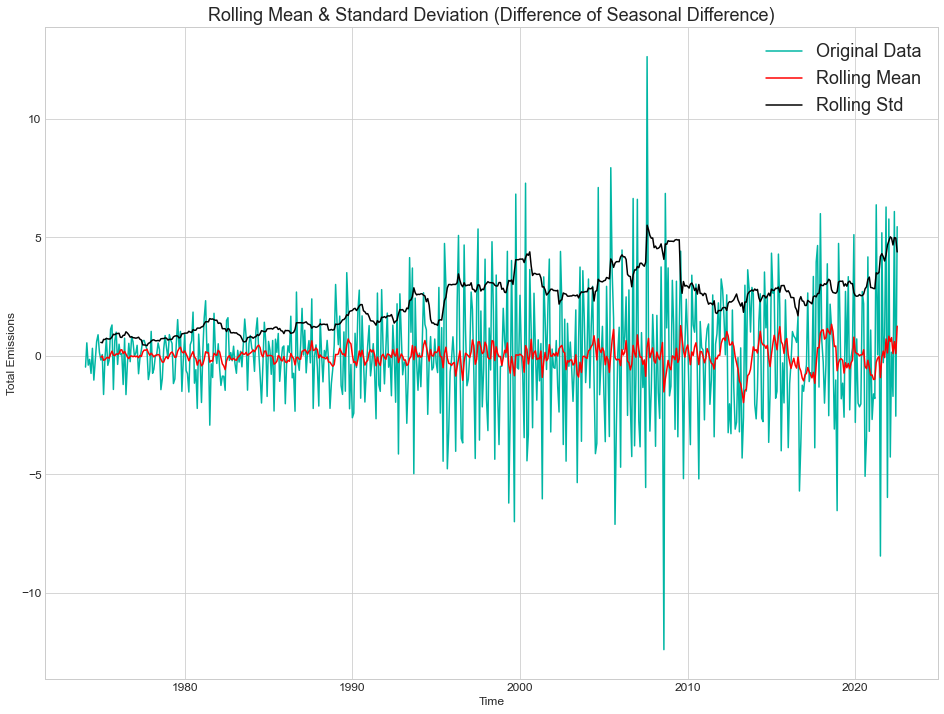

In [127]:
gas_seasonal_first_difference = gas_first_difference -gas_first_difference.shift(12)  
TestStationaryPlot(gas_seasonal_first_difference.dropna(inplace=False), 'Difference of Seasonal Difference')

In [128]:
sts.adfuller(gas_seasonal_first_difference.dropna(inplace=False))

(-9.433619967271259,
 5.111446512343457e-16,
 14,
 567,
 {'1%': -3.441935806025943,
  '5%': -2.8666509204896093,
  '10%': -2.5694919649816947},
 2474.174283739269)

Removing both trend and seasonality greatly improve the stationarity. I also noticed that the 14th-18th lag indicating that 1-2 year prior to the current time has a strong correlation to the current emission value. 

### c) Decomposing 
The decomposition function uses the previous period values as a trendsetter. It decomposes a time seires into 3 effects: Trend/Pattern, Seasonal/Cyclical effects, and Residual/Error of Predection.

Because the seasonal variation in our dataset looks constant over time, we will use the additive model for decomposition (as opposed to the multiplicative model, which is useful for cases where seasonal variation increases over time).

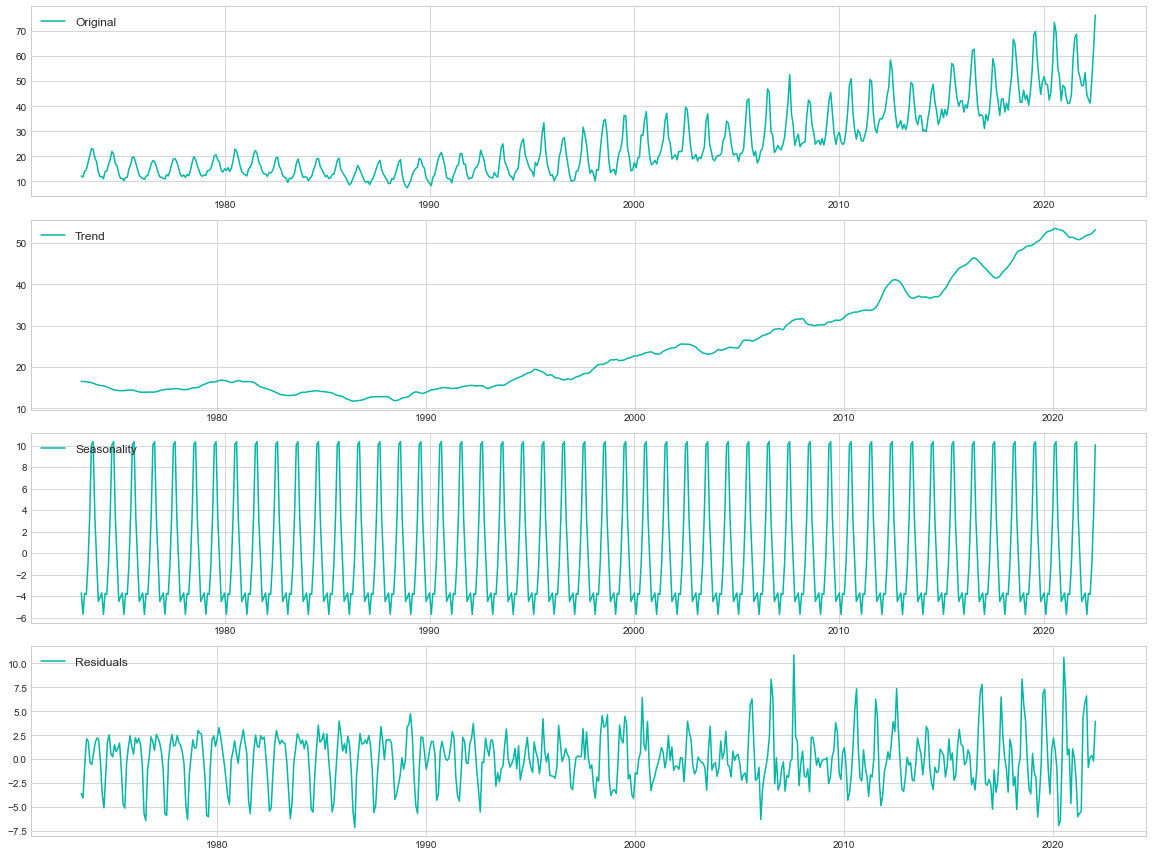

In [129]:
s_dec_multiplicative = seasonal_decompose(gas, model = "additive")
trend = s_dec_multiplicative.trend
seasonal = s_dec_multiplicative.seasonal
residual = s_dec_multiplicative.resid

plt.figure(figsize=(16,12))

plt.subplot(411)
plt.plot(gas, color="#00b6a4",label='Original')
plt.legend(loc='upper left', fontsize=12)

plt.subplot(412)
plt.plot(trend,  color="#00b6a4",label='Trend')
plt.legend(loc='upper left',fontsize=12)

plt.subplot(413)
plt.plot(seasonal, color="#00b6a4",label='Seasonality')
plt.legend(loc='upper left',fontsize=12)

plt.subplot(414)
plt.plot(residual, color="#00b6a4", label='Residuals')
plt.legend(loc='upper left',fontsize=12)

plt.tight_layout()

In [130]:
seasonal.iplot(kind="line",color = '#00b6a4',title = 'Seasnonality of Natural Gas CO2 Emissions')

The interactive chart shows how carbon emissions peak at the summer time and decay in the winter.

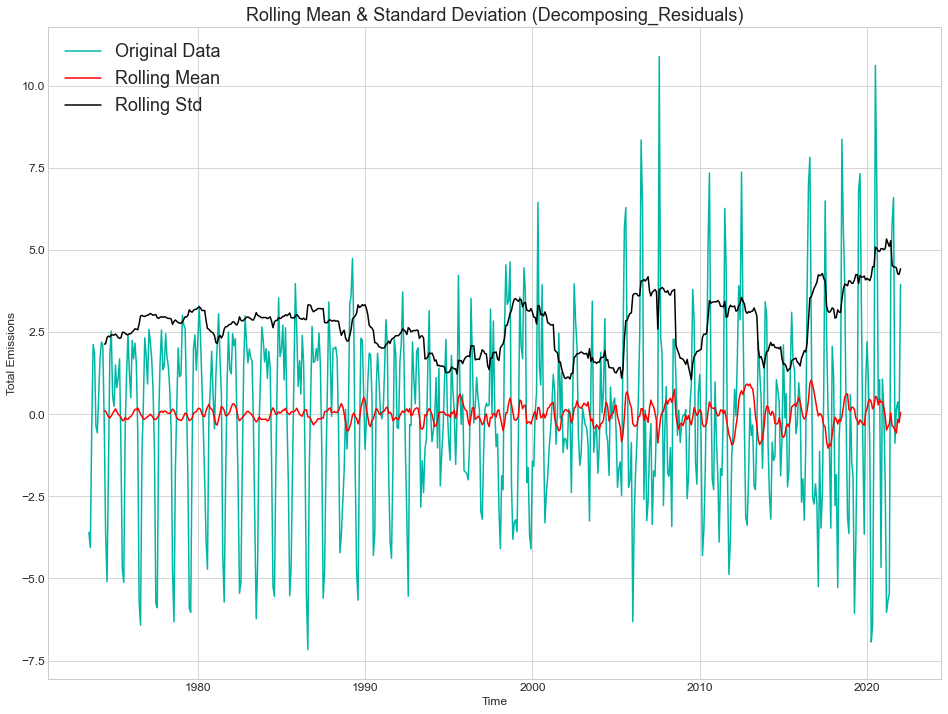

(-9.140614263388544,
 2.856075359664052e-15,
 19,
 563,
 {'1%': -3.4420185006698127,
  '5%': -2.8666873299250253,
  '10%': -2.5695113665058726},
 2110.7898288194847)

In [131]:
gas_decompose = residual
gas_decompose.dropna(inplace=True)
TestStationaryPlot(gas_decompose, 'Decomposing_Residuals')
sts.adfuller(gas_decompose)

<a id="5"></a>
<h1><b><span style="color: #273e47; font-size: 24px">6. DATA MODELLING </span></b></h1>

The previous section investigates the methods to transform a non-stationary dataset into stationary one. However, traditional statsmodel SARIMA can directly model non-stationary dataset. I have taken two approaches to determine the ideal SARIMA parameters: ACF and PACF plots, and a grid search.

### SARIMA Model

SARIMA model can adjust a non-stationary time series by removing trend and seasonality.SARIMA is a method for time series forecasting with univariate data containing trends and seasonality.
    
For the 3 trend elements, they are the same as the ARIMA model; specifically:

- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.
    
For seasonal elements which are not part of ARIMA, there are 4 elements to be configured:
    
- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period.

### ACF & PACF
As can be seen, there are significant negative spikes in the ACF plot at lag 1 and lag 12 (yearly seasonal component). In the PACF plot, there are significant negative spikes at lags 1 and 2 (i.e. lags are slower to decay), as well as significant negative spikes at lags 12, 24, 36, etc. These characteristics suggest a potential parameter starting point of SARIMA(0,1,1)x(0,1,1,12):

p and P both equal 0 (no significant positive spikes in ACF and PACF plots)
    
d and D both equal 1 (first difference and seasonal difference)
    
q and Q both equal 1 (significant negative spikes, PACF decay is more gradual)
    
s equal to 12 (yearly seasonal component)
    
https://towardsdatascience.com/time-series-forecasting-with-a-sarima-model-db051b7ae459

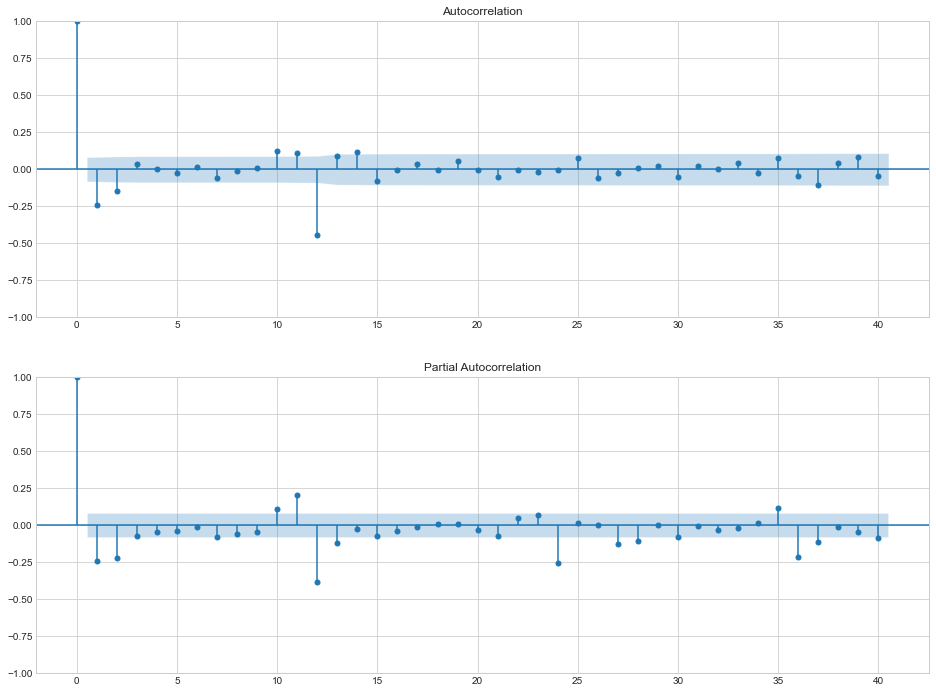

In [132]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gas_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gas_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

### Grid Search

In [133]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2 
from math import sqrt

In [134]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q

In [135]:
aic_results = []
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(gas,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            if results.mle_retvals is not None and results.mle_retvals['converged'] == False:
                print(results.mle_retvals)
            aic_results.append(results.aic)
        except:
            continue
aic_results.sort()
print('Best AIC found: ', aic_results[0])

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:5668.879946456644
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:4915.977343033395
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:3026.8562772919718
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2945.4415288992923
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2996.068690639592
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2863.8053865598486
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2951.5380503198276
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2946.654237166783
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:4931.33160348116
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:4258.808974686142
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2773.00856357105
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2668.947590832718
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2763.925796548997
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2604.8076781025766
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2683.200230082284
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2670.0049362841187
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:3481.236538822112
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:3103.460153406397
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:2722.93

SARIMAX(1, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 2372.116. Therefore, I will consider this to be optimal option out of all the parameter combinations.

In [136]:
mod = sm.tsa.statespace.SARIMAX(gas, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Natural Gas   No. Observations:                  595
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1182.058
Date:                            Mon, 02 Jan 2023   AIC                           2372.116
Time:                                    13:54:11   BIC                           2389.485
Sample:                                01-01-1973   HQIC                          2378.894
                                     - 07-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6812      0.032     21.398      0.000       0.619       0.744
ma.L1         -0.9702      0.013   

Here, the P values of all the coefficients are 0 suggesting past one lag has a direct and significant effect on the present, so it is reasonable to include the features in the model.

### Model Diagnostic

<AxesSubplot:xlabel='Time'>

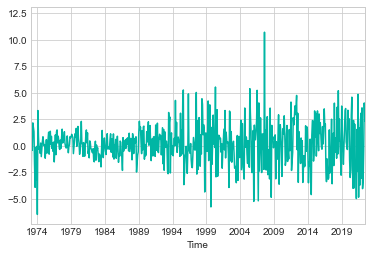

In [137]:
results.resid.plot(color = '#00b6a4')

In [138]:
print(results.resid.describe())

count    595.000000
mean       0.153825
std        1.993908
min       -6.475446
25%       -0.865539
50%        0.118121
75%        1.134894
max       12.163000
dtype: float64


<AxesSubplot:ylabel='Density'>

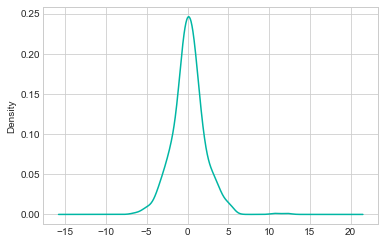

In [139]:
results.resid.plot(kind='kde',color = '#00b6a4')

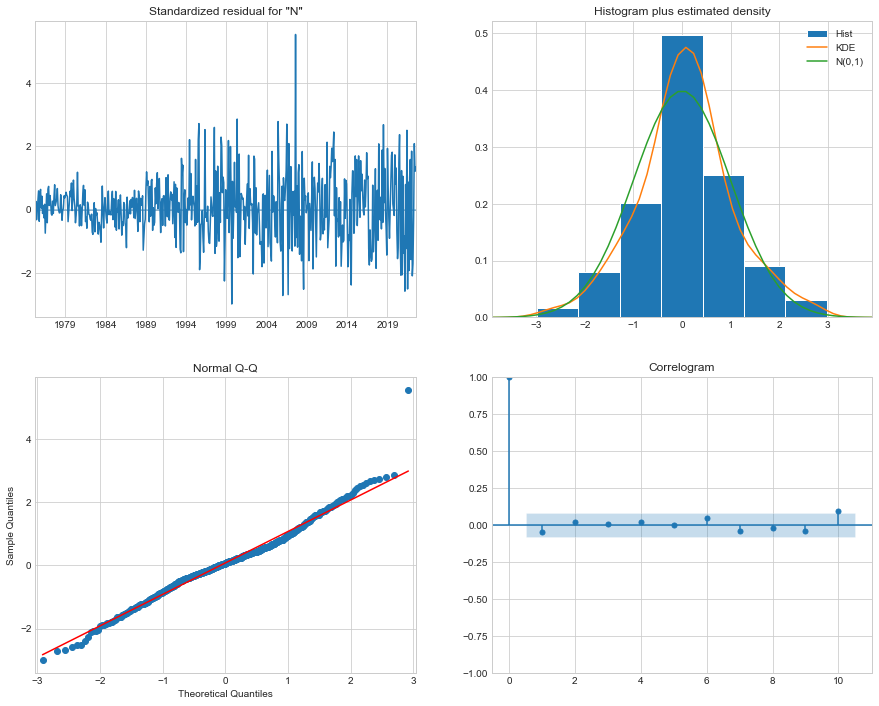

In [140]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

The model diagnostic suggests that the model residual is normally distributed and are uncorrelated.

- Top left plot: the residuals over time  don't display any obvious trend and seasonality.

- Top right plot: the red KDE line follows closely with the N(0,1) line.  This is a good indication that the residuals are normally distributed. 

- Bottom left plot: the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution, indicating that the residuals are normally distributed.

- Bottom right plot: the autocorrelation plot shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead me to conclude that the model produces a satisfactory fit.

### Validating Prediction
I start by comparing predicted values to real values of the time series, which will help me understand the accuracy of our future forecast.

The dynamic=False argument ensures one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point. Then I can plot the real and forecasted values of the CO2 emission time series to assess how well the model fits.

In [141]:
pred = results.get_prediction(start = 552, end = 594, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head(5)

lower Natural Gas  upper Natural Gas
2019-01-01          38.864179          46.428321
2019-02-01          37.445610          45.009752
2019-03-01          41.166504          48.730646
2019-04-01          38.402089          45.966230
2019-05-01          41.987036          49.551177

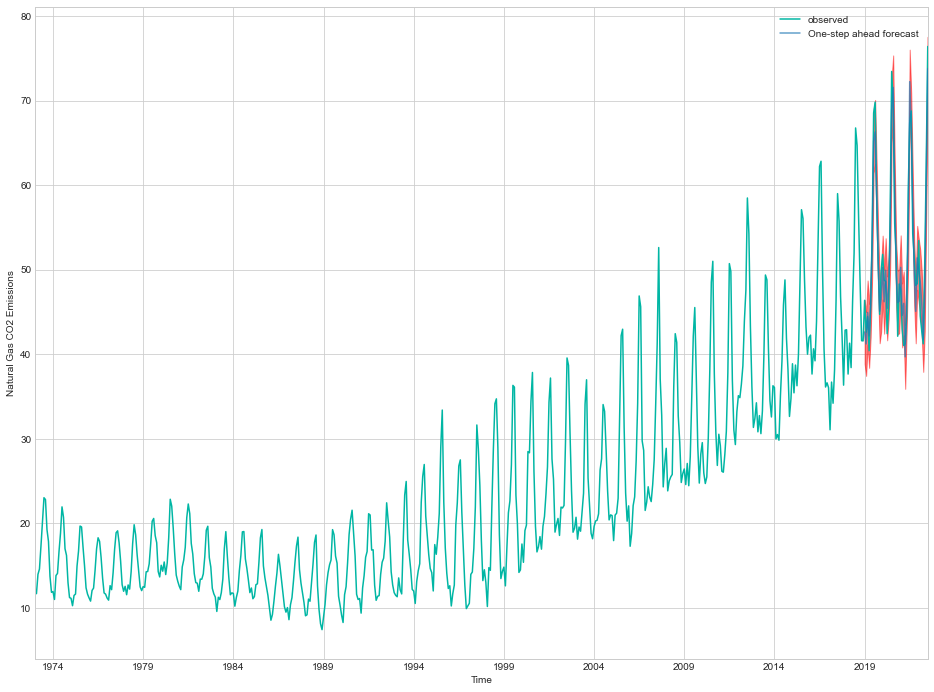

In [142]:
plt.figure(figsize=(16,12))
ax = gas['1973':].plot(label='observed',color = '#00b6a4')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time')
ax.set_ylabel('Natural Gas CO2 Emissions')
plt.legend()

plt.show()

Overall, the forecast align with the true values very well.

It is also useful to quantify the accuracy of our forecastsby examining the MSE (Mean Squared Error).

In [143]:
gas

Time
1973-01-01    12.163
1973-02-01    11.696
1973-03-01    13.979
1973-04-01    14.612
1973-05-01    17.326
               ...  
2022-03-01    42.755
2022-04-01    41.244
2022-05-01    50.612
2022-06-01    62.751
2022-07-01    76.407
Name: Natural Gas, Length: 595, dtype: float64

In [144]:
gas_forecast = pred.predicted_mean
gas_truth = gas["2019-01-01":]

# Compute the mean square error
gas_error = ((gas_forecast - gas_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(gas_error, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((gas_forecast-gas_truth)**2)/len(gas_forecast))))

The Mean Squared Error (MSE) of the forecast is 8.21
The Root Mean Square Error (RMSE) of the forecast: 2.8650


In [145]:
gas_pred_concat = pd.concat([gas_truth,gas_forecast])

### Dynamic Forecast

Since eventually I will do out-of-sample prediction, I made dynamic equals to true here to examine the prediction accuracy, that is to use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

In [146]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [147]:
gas

Time
1973-01-01    12.163
1973-02-01    11.696
1973-03-01    13.979
1973-04-01    14.612
1973-05-01    17.326
               ...  
2022-03-01    42.755
2022-04-01    41.244
2022-05-01    50.612
2022-06-01    62.751
2022-07-01    76.407
Name: Natural Gas, Length: 595, dtype: float64

In [148]:
gas['1973-01-01':]

Time
1973-01-01    12.163
1973-02-01    11.696
1973-03-01    13.979
1973-04-01    14.612
1973-05-01    17.326
               ...  
2022-03-01    42.755
2022-04-01    41.244
2022-05-01    50.612
2022-06-01    62.751
2022-07-01    76.407
Name: Natural Gas, Length: 595, dtype: float64

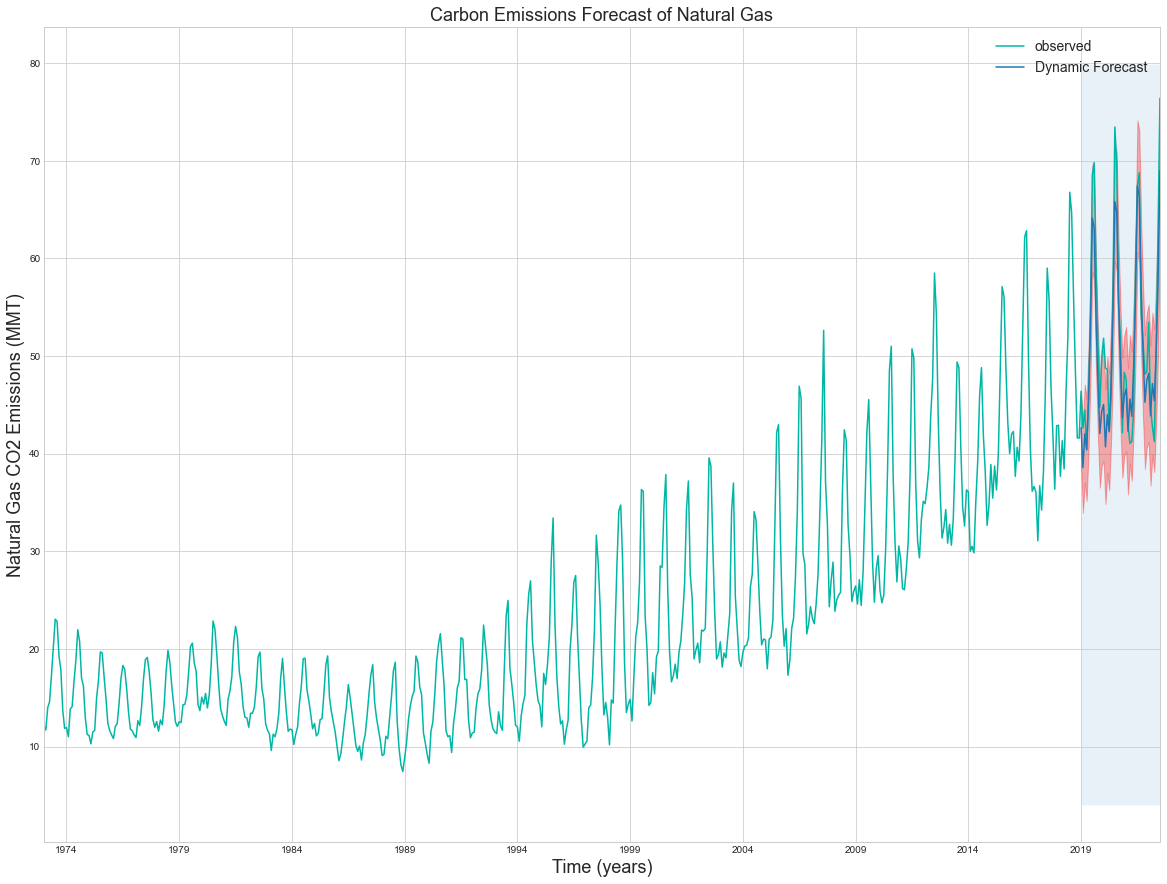

In [149]:
ax = gas['1973':].plot(label='observed', figsize=(20, 15),color = '#00b6a4')
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)


ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2019-01-01'), 
                 gas.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)',fontsize=18)
ax.set_ylabel('Natural Gas CO2 Emissions (MMT)',fontsize=18)
ax.set_title('Carbon Emissions Forecast of Natural Gas', fontsize = 18,loc="center")

plt.legend(fontsize=14)
plt.show()

In [150]:
gas_forecast2 = pred_dynamic.predicted_mean
gas_original2 = gas['2019-01-01':]

# Compute the mean square error
gas_error2 = ((gas_forecast2 - gas_original2) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(gas_error2, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((gas_forecast2-gas_original2)**2)/len(gas_forecast2))))

The Mean Squared Error (MSE) of the forecast is 15.2
The Root Mean Square Error (RMSE) of the forecast: 3.8984


In [151]:
((gas_forecast2 - gas_original2) ** 2).mean()

15.197860016209308

<a id="6"></a>
<h1><b><span style="color: #273e47; font-size: 24px">7. CONCLUSION </span></b></h1>

From the analysis and graphs I prodcued below, I can clearly see the CO2 emission from natural gas power generation is expected to continue increasing. To be specific, by 2032 July, there will be 92 MMT emission compared to 76 MMT in 2022 July. That is 21% growth in 10 years! 

In [152]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast3 = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast3.conf_int()
forecast_ci.head()

lower Natural Gas  upper Natural Gas
2022-08-01          70.610931          78.175073
2022-09-01          56.777111          66.057945
2022-10-01          50.634083          60.696429
2022-11-01          44.253964          54.718553
2022-12-01          46.724508          57.414239

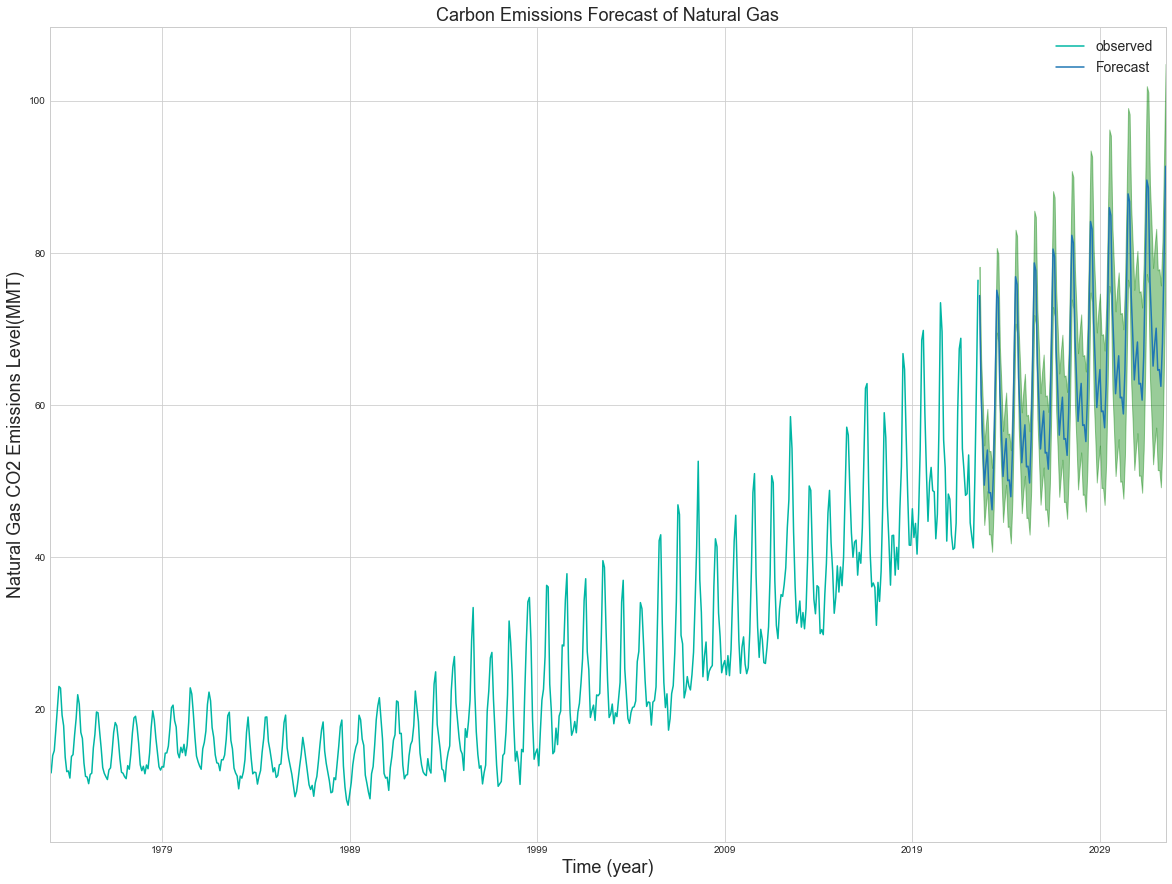

In [153]:
ax = gas.plot(label='observed', figsize=(20, 15),color = '#00b6a4')
forecast3.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)',fontsize=18)
ax.set_ylabel('Natural Gas CO2 Emissions Level(MMT)',fontsize=18)
ax.set_title('Carbon Emissions Forecast of Natural Gas', fontsize = 18,loc="center")


plt.legend(fontsize=14)
plt.show()


In [154]:
fore=forecast3.predicted_mean
fore.iplot(ax=ax,color = '#00b6a4')

In [155]:
gas.iplot(kind="line",color = '#00b6a4')